## Name: Trang Hoang 
## Homework 2: 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import statsmodels.api as sm
import os


In [2]:
current_wd= os.getcwd()
# Load prostate data
prostate = pd.read_csv(f"{current_wd}/prostate.csv")
# Subset to training examples
prostate_train = prostate[prostate['train'] == True]

prostate.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,True
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,True
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,True
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,True
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,True


## Homework Answer
After translating the code from R to Python, I will now answer and do tasks for this homework 

1) Write functions that implement the L1 loss and tilted absolute loss functions


In [3]:
# L1 loss function
def L1_loss(y, yhat):
    return np.abs(y - yhat)

# L2 loss function
def L2_loss(y, yhat):
    return (y - yhat) ** 2

# Tilted absolute loss function
def tilted_abs_loss(y, yhat, tau=0.5):
    d = y - yhat
    return np.where(d > 0, d * tau, -d * (1 - tau))



2) Create a figure that shows lpsa (x-axis) versus lcavol (y-axis). Add and label (e.g., using the 'legend' function in R) the linear model predictors associated with L2 loss, L1 loss, and tilted absolute value loss for tau = 0.25 and 0.75.

In [4]:

# Make predictions from linear model
def predict_lin(x, beta):
    return beta[0] + beta[1] * x

# Fit linear model (modified to handle different loss functions)
def fit_lin(y, x, loss=L2_loss, beta_init=np.array([-0.51, 0.75])):
    def err(beta):
        return np.mean(loss(y, beta[0] + beta[1] * x))
    result = minimize(err, beta_init)
    return result.x

# Function to plot lcavol vs lpsa
# plot_psa_data function to accept an axes object
def plot_psa_data(dat=prostate_train, ax=None):
    if ax is None:
        ax = plt.gca()  # Get the current Axes instance on the current figure
    ax.scatter(dat['lpsa'], dat['lcavol'], label='Data Points')
    ax.set_xlabel("log Prostate Screening Antigen (psa)")
    ax.set_ylabel("log Cancer Volume (lcavol)")

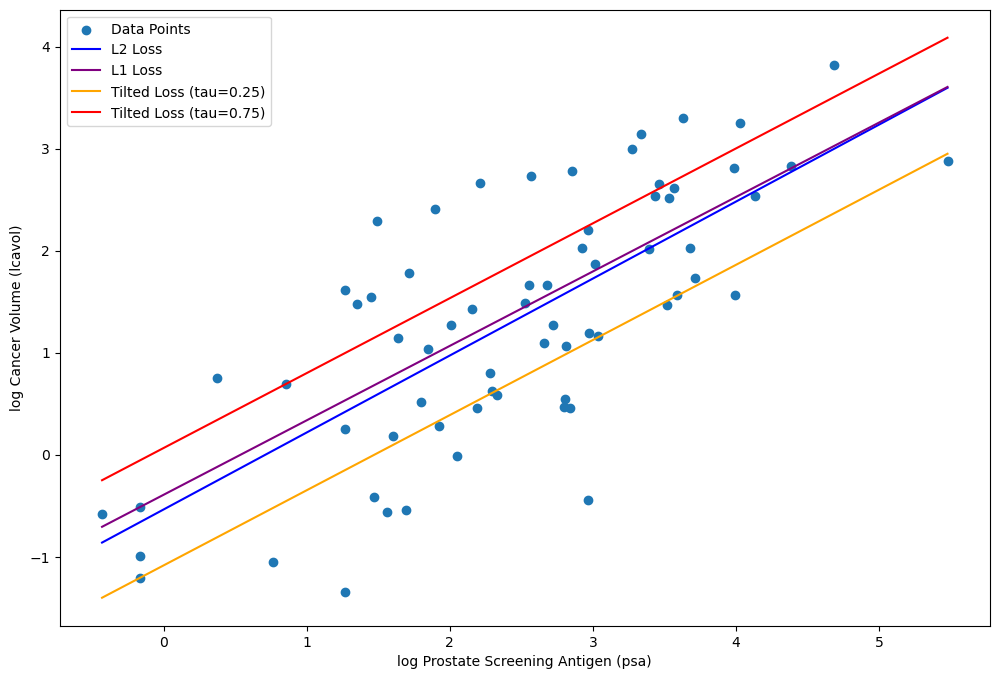

In [5]:
# Fit linear models using different loss functions
beta_L2 = fit_lin(prostate_train['lcavol'], prostate_train['lpsa'], loss=L2_loss)
beta_L1 = fit_lin(prostate_train['lcavol'], prostate_train['lpsa'], loss=L1_loss)
beta_tilted_25 = fit_lin(prostate_train['lcavol'], prostate_train['lpsa'], loss=lambda y, yhat: tilted_abs_loss(y, yhat, tau=0.25))
beta_tilted_75 = fit_lin(prostate_train['lcavol'], prostate_train['lpsa'], loss=lambda y, yhat: tilted_abs_loss(y, yhat, tau=0.75))

# Create x-axis grid for plotting
x_grid = np.linspace(prostate_train['lpsa'].min(), prostate_train['lpsa'].max(), 100)

# Generate predictions
pred_L2 = predict_lin(x_grid, beta_L2)
pred_L1 = predict_lin(x_grid, beta_L1)
pred_tilted_25 = predict_lin(x_grid, beta_tilted_25)
pred_tilted_75 = predict_lin(x_grid, beta_tilted_75)

# Plot data and predictions
plt.figure(figsize=(12, 8))
plot_psa_data()  # Scatter plot of data
plt.plot(x_grid, pred_L2, label='L2 Loss', color='blue')
plt.plot(x_grid, pred_L1, label='L1 Loss', color='purple')
plt.plot(x_grid, pred_tilted_25, label='Tilted Loss (tau=0.25)', color='orange')
plt.plot(x_grid, pred_tilted_75, label='Tilted Loss (tau=0.75)', color='red')
plt.legend()
plt.show()


3) Write functions to fit and predict from a simple nonlinear model with three parameters defined by `'beta[1] + beta[2]*exp(-beta[3]*x)`. 

Hint: make copies of 'fit_lin' and 'predict_lin' and modify them to fit the nonlinear model. Use c(-1.0, 0.0, -0.3) as 'beta_init'.

In [6]:
# Make predictions from non-linear model
def predict_nonlinear(x, beta):
    return beta[0] + beta[1] * np.exp(-beta[2] * x)

def fit_nonlinear(y, x, loss=L2_loss, beta_init=np.array([-1.0, 0.0, -0.3])):
    def err(beta):
        return np.mean(loss(y, beta[0] + beta[1] * np.exp(-beta[2] * x)))
    result = minimize(err, beta_init)
    return result.x 



4) Create a figure that shows lpsa (x-axis) versus lcavol (y-axis). Add and label the nonlinear model predictions associated with L2 loss, L1 loss, and tilted absolute value loss for tau = 0.25 and 0.75.

In [7]:
# Fit nonlinear models using different loss functions
beta_nonlinear_L2 = fit_nonlinear(prostate_train['lcavol'], prostate_train['lpsa'], loss=L2_loss)
beta_nonlinear_L1 = fit_nonlinear(prostate_train['lcavol'], prostate_train['lpsa'], loss=L1_loss)
beta_nonlinear_tilted_25 = fit_nonlinear(prostate_train['lcavol'], prostate_train['lpsa'], loss=lambda y, yhat: tilted_abs_loss(y, yhat, tau=0.25))
beta_nonlinear_tilted_75 = fit_nonlinear(prostate_train['lcavol'], prostate_train['lpsa'], loss=lambda y, yhat: tilted_abs_loss(y, yhat, tau=0.75))

# Generate predictions
pred_nonlinear_L2 = predict_nonlinear(x_grid, beta_nonlinear_L2)
pred_nonlinear_L1 = predict_nonlinear(x_grid, beta_nonlinear_L1)
pred_nonlinear_tilted_25 = predict_nonlinear(x_grid, beta_nonlinear_tilted_25)
pred_nonlinear_tilted_75 = predict_nonlinear(x_grid, beta_nonlinear_tilted_75)



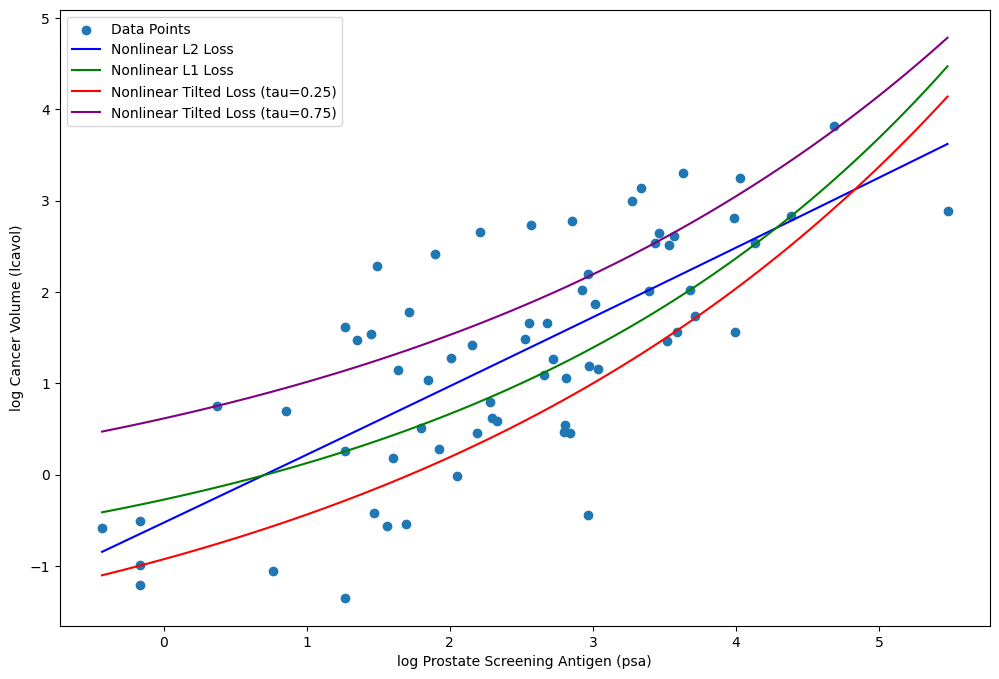

In [8]:
# Plot data and nonlinear model predictions
plt.figure(figsize=(12, 8))
plot_psa_data()  # Scatter plot of data
plt.plot(x_grid, pred_nonlinear_L2, label='Nonlinear L2 Loss', color='blue')
plt.plot(x_grid, pred_nonlinear_L1, label='Nonlinear L1 Loss', color='green')
plt.plot(x_grid, pred_nonlinear_tilted_25, label='Nonlinear Tilted Loss (tau=0.25)', color='red')
plt.plot(x_grid, pred_nonlinear_tilted_75, label='Nonlinear Tilted Loss (tau=0.75)', color='purple')
plt.legend()
plt.show()